In this dataset no of wins(W) is to be predicted based on the other attributes, so we will perform using linear regression

In [1]:
#importing the required libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [3]:
#reading the csv file

In [4]:
df=pd.read_csv('baseball.csv')

In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


PERFORMING EXPLORATORY DATA ANALYSIS

In [6]:
#in this dataset we have to predict the no of wins which is denoted by 'W' so will use linear regregression algorithm to predict

In [7]:
df.shape

(30, 17)

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.info()  #from the below we can infer that no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [10]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Data Visualisation

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

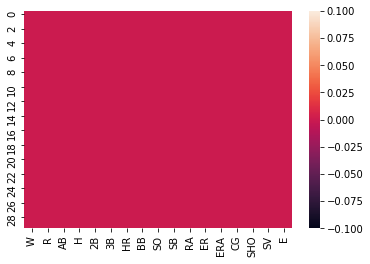

In [13]:
#checking the null values through heatmap
sns.heatmap(df.isnull())

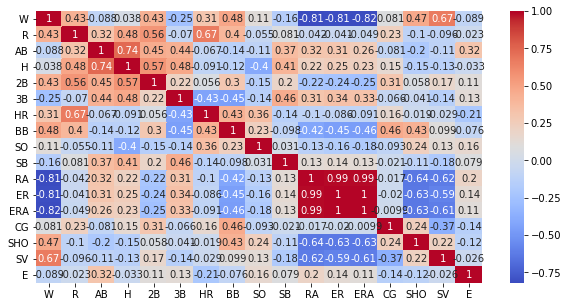

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [15]:
#dividing the dataset in x(feature names) and y(target variables)

In [16]:
x=df.iloc[:,1:]

In [17]:
x.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [18]:
y=df.iloc[:,0].values
y=y.reshape(-1,1)

In [19]:
y.shape

(30, 1)

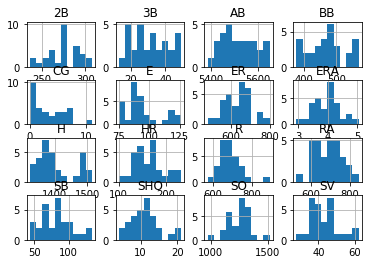

In [20]:
x.hist()
plt.show()

In [21]:
#checking skewness in data
df.skew()
# from the below result we find that only R column is skewed

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [22]:
#removing skewness from R column

In [23]:
df['R']=np.log(df['R'])

In [24]:
df['R'].skew()

0.7441956366104983

(array([1., 2., 5., 6., 8., 4., 3., 0., 0., 1.]),
 array([6.35088572, 6.39503159, 6.43917746, 6.48332333, 6.5274692 ,
        6.57161507, 6.61576094, 6.65990681, 6.70405269, 6.74819856,
        6.79234443]),
 <a list of 10 Patch objects>)

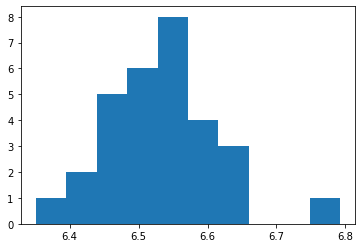

In [25]:
plt.hist(df['R'],bins=10)

In [26]:
#performing other visualisation techniques

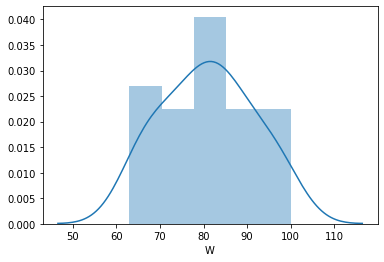

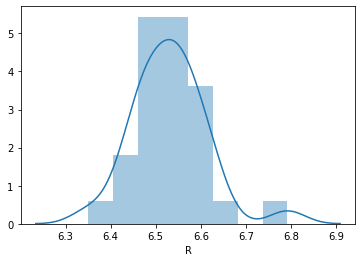

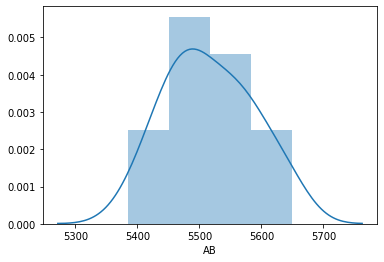

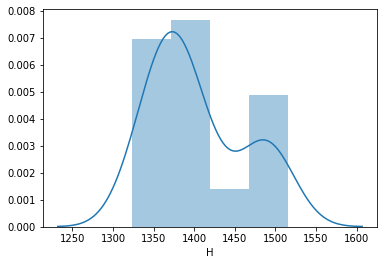

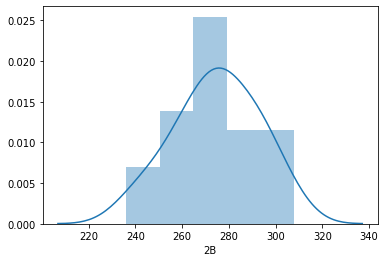

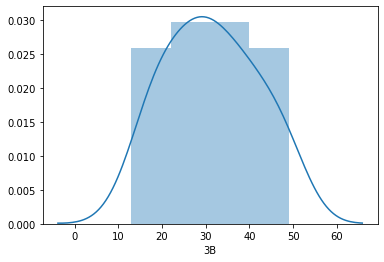

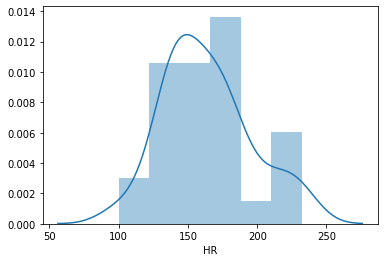

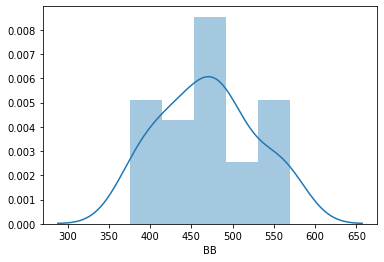

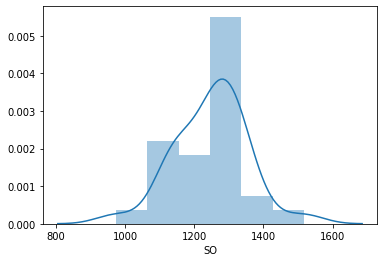

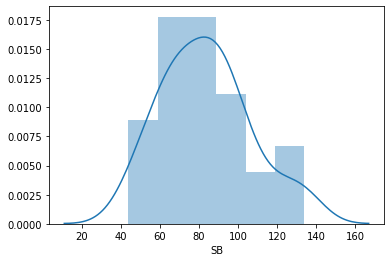

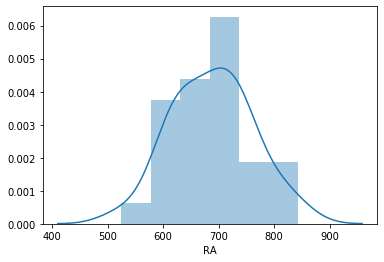

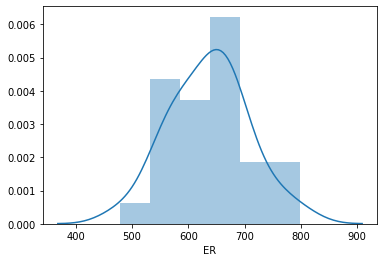

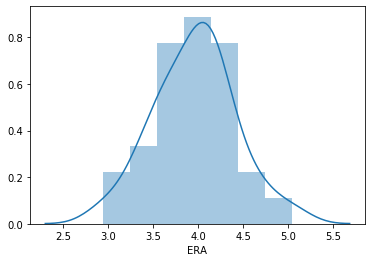

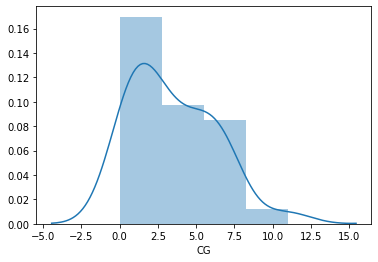

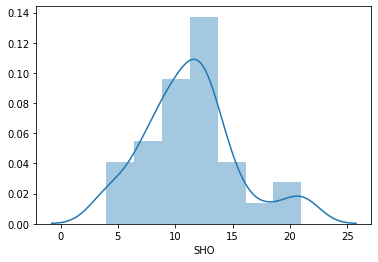

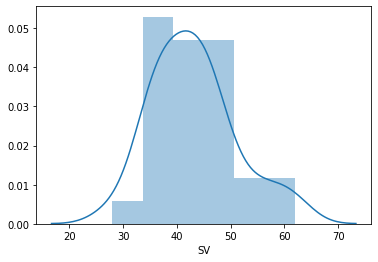

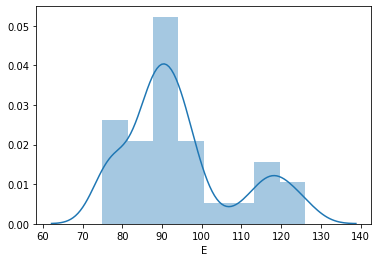

In [27]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

In [28]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.584791,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,6.545350,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,6.505784,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,6.432940,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,6.535241,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<BarContainer object of 30 artists>

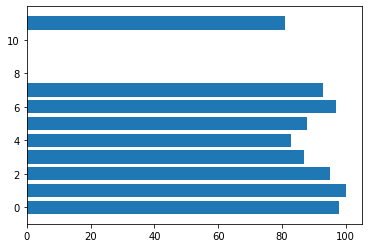

In [29]:
plt.barh(df['CG'],df["W"])

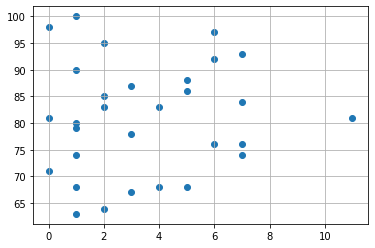

In [30]:
plt.scatter(df['CG'],df['W'])
plt.grid()

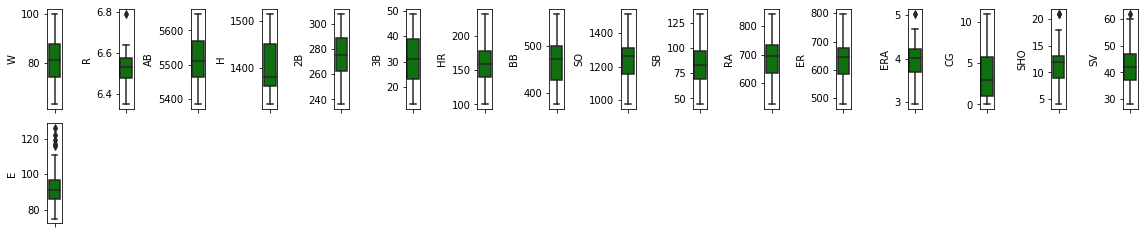

In [31]:
#checking the outliers in the data
collist=df.columns.values
ncol=16
nrows=10
plt.figure(figsize=(ncol,ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green",orient="v")
    plt.tight_layout()

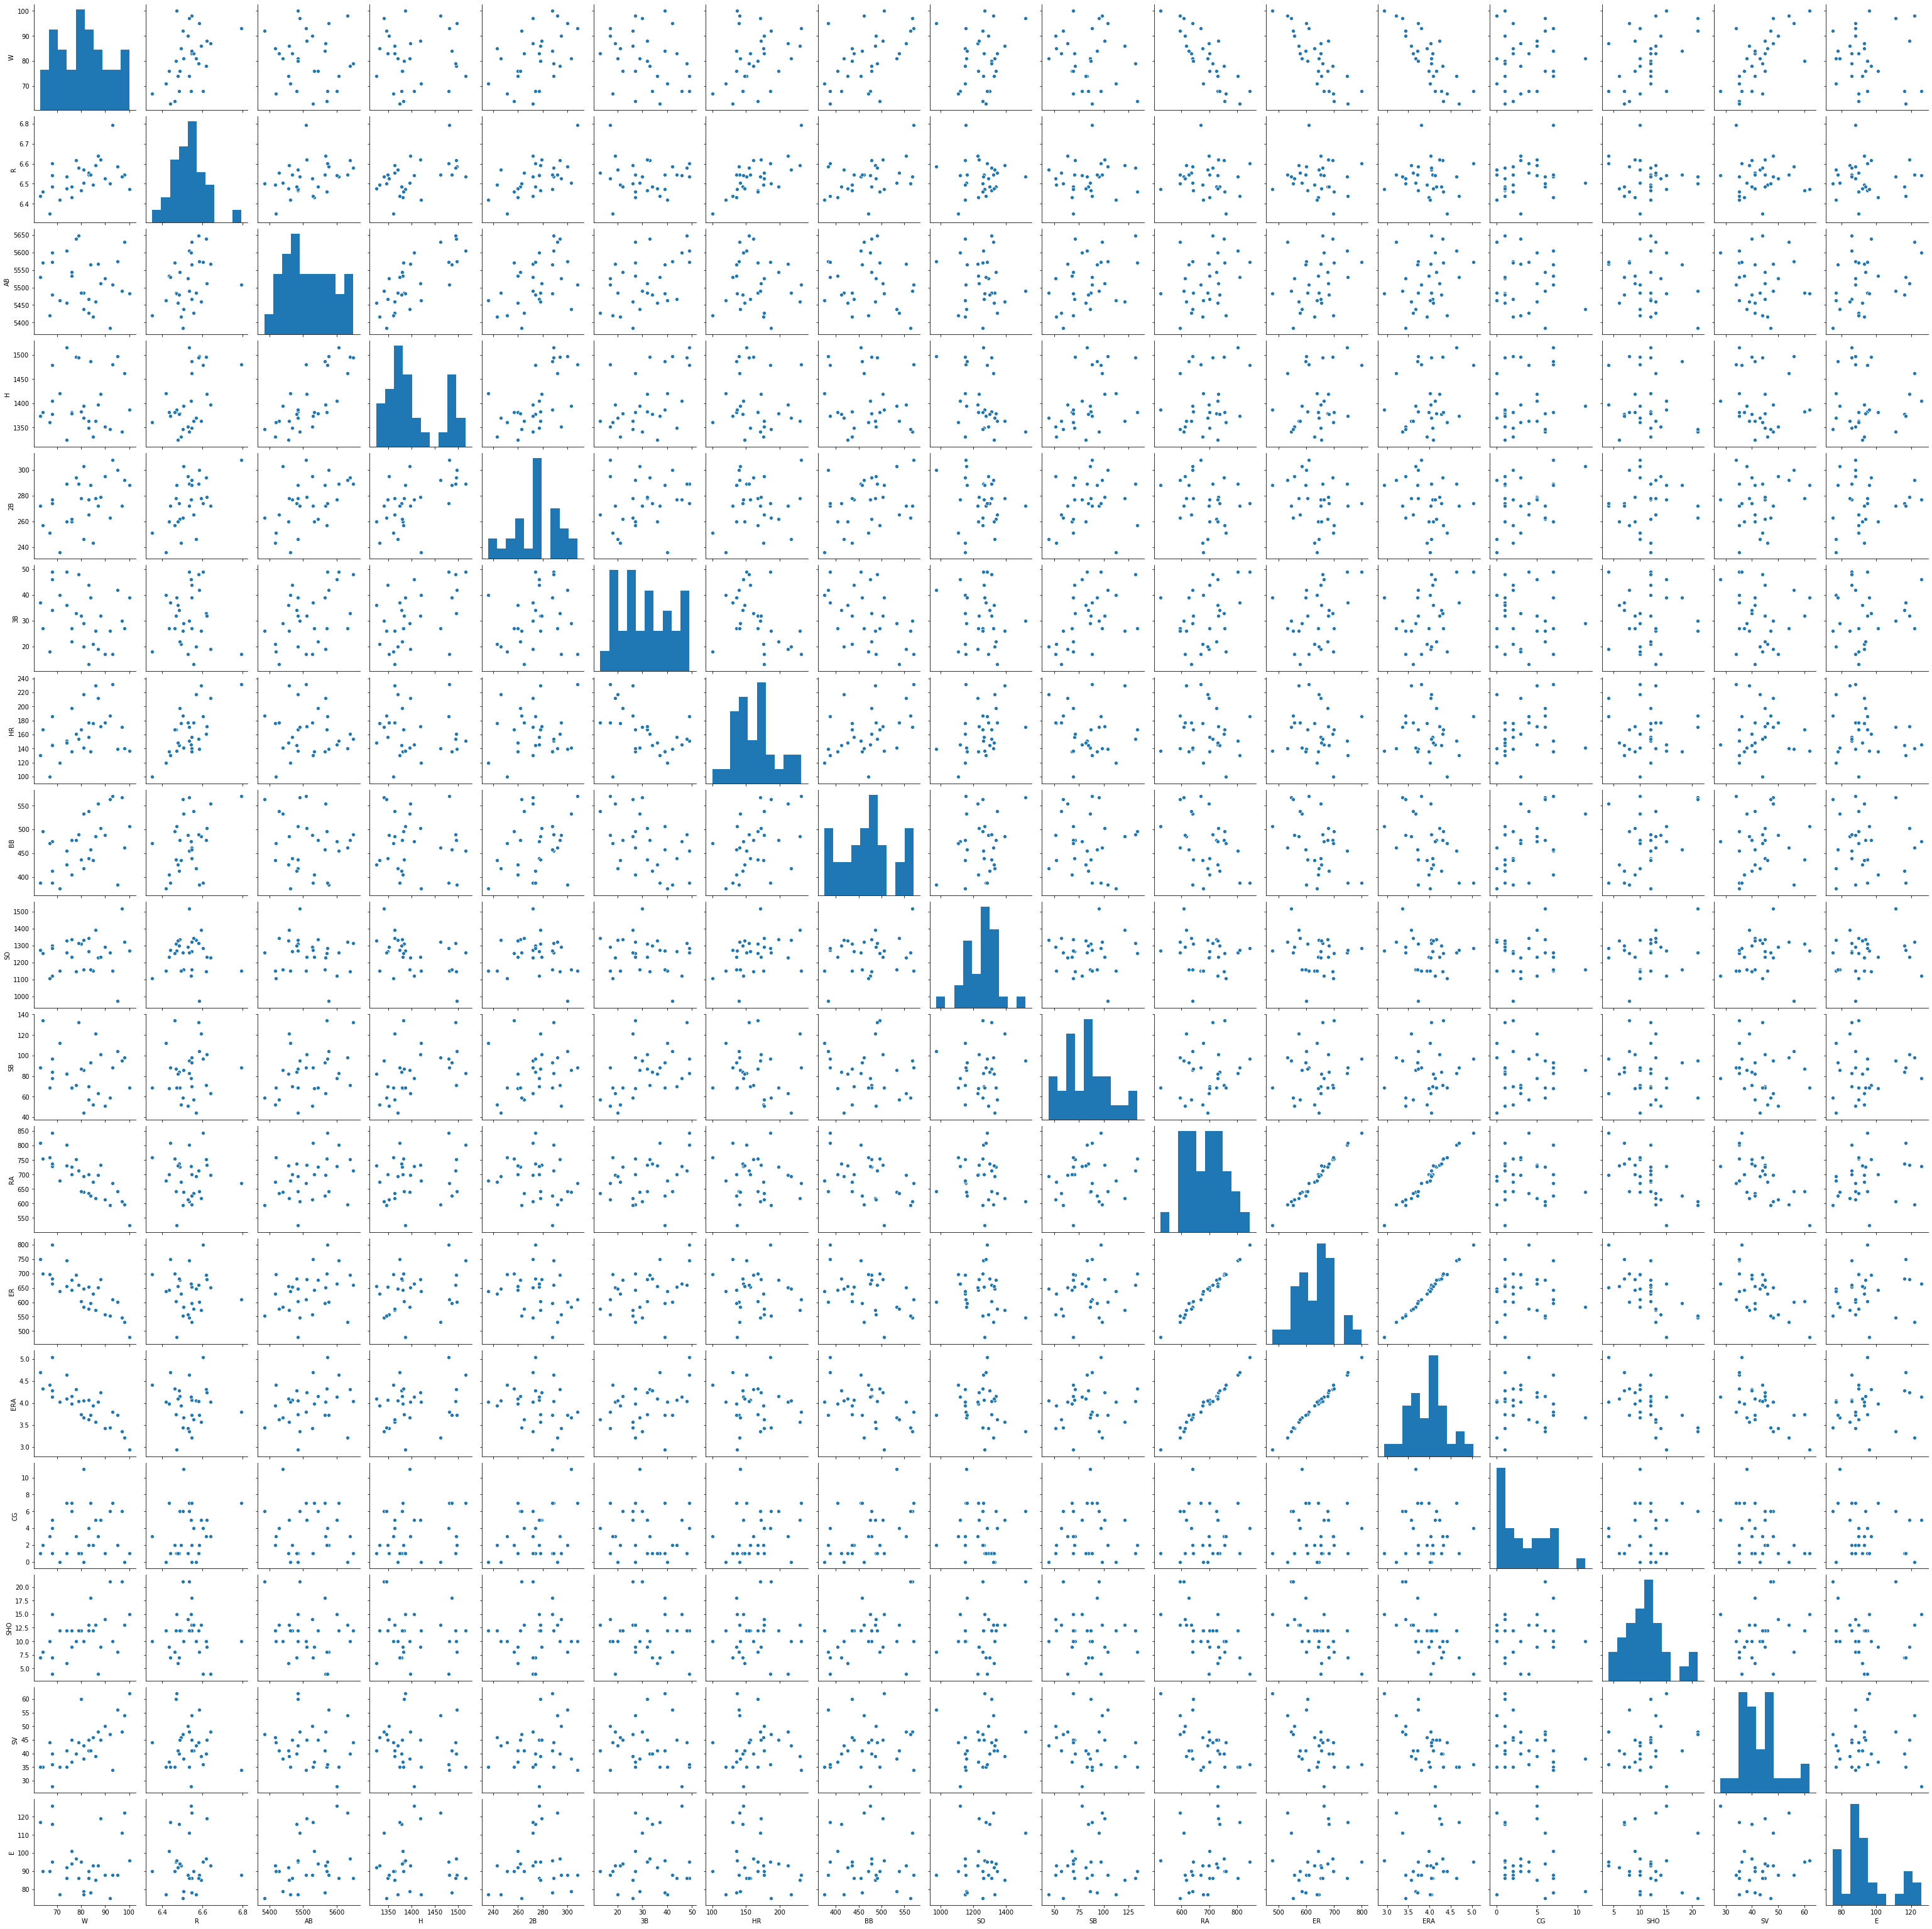

In [32]:
sns.pairplot(df)

In [33]:
#removing outliers from the dataset

In [34]:
from scipy.stats import zscore

In [35]:
z=np.abs(zscore(df))

In [36]:
threshold=2.5
print(np.where(z>2.5))

(array([ 0,  2,  5, 17], dtype=int64), array([ 8, 13,  1,  8], dtype=int64))


In [37]:
df_new=df[(z<2.5).all(axis=1)]

In [38]:
df_new.shape

(26, 17)

In [39]:
df.shape

(30, 17)

In [40]:
#from the above we conclude that the outliers has been removed from the dataset

APPLYING MACHINE LEARNING ALGORITHM TO PREDICT THE RESULT

In [41]:
#importing the useful libraries

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [43]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.6741942317769304
the r2 score corrosponding to the random state 43 is: -0.10922070623342894
the r2 score corrosponding to the random state 44 is: 0.5911230583078124
the r2 score corrosponding to the random state 45 is: -3.0066445207538948
the r2 score corrosponding to the random state 46 is: 0.32331162278945846
the r2 score corrosponding to the random state 47 is: 0.5110046884816095
the r2 score corrosponding to the random state 48 is: 0.17388635210014336
the r2 score corrosponding to the random state 49 is: 0.07050643573739679
the r2 score corrosponding to the random state 50 is: 0.6938051478551395
the r2 score corrosponding to the random state 51 is: 0.7233843151379089
the r2 score corrosponding to the random state 52 is: 0.42682040517131115
the r2 score corrosponding to the random state 53 is: 0.3102609371302437
the r2 score corrosponding to the random state 54 is: 0.08333982952639662
the r2 score corrosponding to the random st

In [44]:
lr.coef_

array([[ 1.12838793e-01,  7.31237295e-03,  9.15969842e-03,
        -1.20491415e-01,  1.80361228e-01, -4.77469471e-02,
        -5.78400679e-03,  1.24251365e-02, -4.31843733e-02,
         1.03104813e-01, -3.04820031e-02, -2.85778870e+01,
         8.07432586e-01, -8.12831058e-02,  5.57231242e-01,
        -1.46702283e-01]])

In [45]:
#performing regularisation techniques to avoid over and under fitting

In [46]:
from sklearn.linear_model import Lasso,Ridge

In [47]:
ls=Lasso(alpha=0.01)

In [48]:
ls.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
ls.coef_

array([ 1.10984306e-01,  1.70668968e-02, -7.03862516e-04, -1.17797530e-01,
        1.36761764e-01, -5.08460944e-02, -4.68036205e-03,  1.03247119e-02,
       -3.43954207e-02,  1.26494370e-01, -2.27214781e-01, -0.00000000e+00,
        9.48879157e-01, -1.89381982e-02,  6.37445527e-01, -1.59785664e-01])

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
score=cross_val_score(lr,x,y,cv=5) # checking the best score with cross valid score

In [52]:
score

array([ 0.71136471, -2.21099237,  0.38808753,  0.73556937,  0.5797478 ])

In [53]:
#checking the result with other algorithms

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [55]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=67,test_size=0.33)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.13463532419572422
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 9.500000000000002
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 121.85200000000006
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score -0.27035479677535723
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 12.185039057509737
SVR(C=1.0, c

In [69]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [99]:
ad=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,learning_rate=0.01)

In [100]:
ad.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [101]:
predad=ad.predict(x_test)

In [102]:
r2_score(y_test,predad)

0.2287479582416021

In [103]:
rd=RandomForestRegressor()

In [104]:
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
r2_score(y_test,predrd)   #even after boosting the score doesn't improved

0.4495276613876853

In [57]:
#so finally we came to the conclusion that linear regressor proves to be the better algorithm for prediction, so finalising
#the model

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=67,test_size=0.33)

In [59]:
lr=LinearRegression()

In [60]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
pred=lr.predict(x_test)
print(pred)
a=pd.DataFrame(data=pred)
a.to_csv('baseballresult.csv')  #saved the prdicted result in csv form

[[94.82471595]
 [87.15924547]
 [88.19760002]
 [58.09415499]
 [75.43303964]
 [93.28526222]
 [80.28087417]
 [88.66112097]
 [58.2416428 ]
 [89.39399322]]


In [62]:
r2_score(y_test,pred)

0.7949883286982093

In [63]:
mean_absolute_error(y_test,pred)

4.306908342586598

In [64]:
from math import sqrt
sqrt(mean_squared_error(y_test,pred))

5.372866407794366

In [65]:
#serialisation of final model

In [66]:
from sklearn.externals import joblib

In [67]:
filename='baseball_wins_prediction'

In [68]:
joblib.dump(lr,filename)

['baseball_wins_prediction']